# Домашнее задание "Функции потерь и оптимизация"

Реализовать самостоятельно логистическую регрессию.

Обучить ее методом градиентного спуска.

Методом nesterov momentum.

Методом rmsprop.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
X, y = make_blobs(n_samples=100, centers=[[-2, 0.5], [2, -0.5]], n_features=2, random_state=42)


In [3]:
X.shape

(100, 2)

In [4]:
y

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

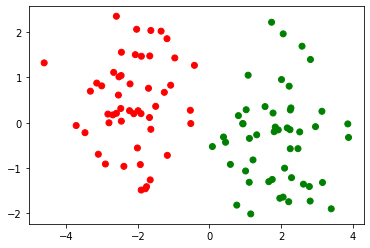

In [5]:


colors = ['red', 'green']

colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    stratify=y)

In [7]:
np.mean(y_train), np.mean(y_test)

(0.5, 0.5)

Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

$z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$

$y_{pred} = a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
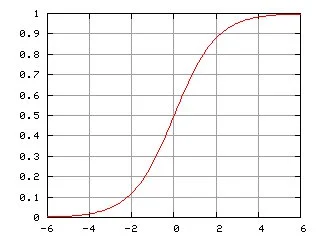

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$
Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = (a-y_i) \cdot x_i $$$$
\frac{\partial L_i}{\partial b} = a-y_i $$
Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [8]:
m, n = X_train.shape

w = np.random.randn(n)
b = np.random.randn()


In [9]:
# def log_loss(y_true, y_pred):
#     return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# def predict(x, w, b):
#     return np.array(sigmoid(np.dot(w, x) + b)) >= threshold


### Логистическая регрессия (Метод стохастического градиентного спуска)

In [10]:
EPOCHS = 200
LEARNING_RATE = 0.01
threshold = 0.5

losses = []
y_preds = []
w = np.random.randn(n)
b = np.random.randn()

for _ in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid((X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)

    b -= LEARNING_RATE * (current_prediction - y_train[i])
    w -= LEARNING_RATE * ((current_prediction - y_train[i]) * X_train[i])

In [11]:
w, b

(array([ 1.50184402, -0.15955382]), -1.1707199339039527)

In [12]:
# predict_proba
y_pred

array([2.39964955e-02, 3.25622952e-03, 4.32545649e-03, 9.32078132e-01,
       1.67229376e-02, 5.54542463e-01, 5.58058465e-01, 7.10220255e-03,
       7.58993892e-03, 6.34174984e-01, 2.96683191e-03, 1.61825388e-02,
       2.97422167e-02, 9.20431095e-01, 3.92694203e-01, 1.92777877e-02,
       6.15817084e-03, 2.39051816e-03, 5.69798269e-01, 8.26877582e-01,
       1.24002206e-02, 5.57601745e-02, 8.96830180e-01, 6.02455613e-03,
       9.08550209e-01, 5.20820993e-03, 9.64703998e-01, 1.02973488e-02,
       9.61751674e-01, 8.49447373e-01, 8.10503504e-01, 1.39938916e-02,
       9.51142310e-01, 7.49694892e-01, 4.60678045e-01, 1.18922450e-01,
       9.90972266e-01, 5.91646821e-03, 7.46762085e-01, 7.03424574e-01,
       2.17529488e-02, 8.33139157e-01, 5.47017388e-02, 8.31232011e-01,
       4.23251895e-03, 6.22834891e-01, 2.47454944e-04, 9.90258138e-01,
       1.17069652e-03, 1.89479090e-02, 6.66316270e-01, 8.83623987e-01,
       1.04944625e-02, 8.18907453e-01, 1.88533547e-03, 4.67963522e-03,
      

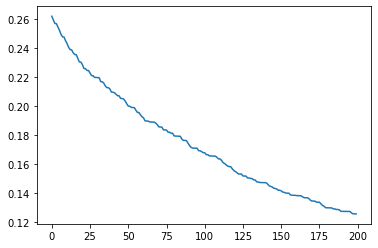

In [13]:
plt.plot(losses)

In [14]:
# присвоение класса [0,1] по предсказанной вероятности
y_pred = [1 if k > threshold else 0 for k in y_pred]

# точность модели
accuracy_score(y_train, y_pred)

0.9714285714285714

### Логистическая регрессия (Метод Nesterov momentum)

In [15]:
EPOCHS = 200
LEARNING_RATE = 0.01
gamma = 0.9
threshold = 0.5

losses = []
y_preds = []
vt_b = []
vt_w = []
w = np.random.randn(n)
b = np.random.randn()
vt_b = [0 for _ in range(len(X_train))]
vt_w = [0 for _ in range(len(X_train))]

for i in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid((X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)
    
    vt_b[i] = gamma*vt_b[i] + LEARNING_RATE*np.sum(current_prediction- y_train[i]) / len(y_train)
    vt_w[i] = gamma*vt_w[i] + LEARNING_RATE*np.sum((current_prediction - y_train[i])*X_train[i]) / len(y_train)

    b -= vt_b[i]
    w -= vt_w[i]

In [16]:
w, b

(array([ 0.09811378, -1.18135557]), -1.5343344439982511)

In [17]:
# predict_proba
y_pred

array([0.13801104, 0.26705826, 0.01026751, 0.3499674 , 0.12384065,
       0.19391983, 0.1956976 , 0.10478842, 0.14037418, 0.2654678 ,
       0.05797738, 0.2557034 , 0.10838163, 0.53061909, 0.27267927,
       0.34834876, 0.07569431, 0.05345514, 0.06456515, 0.24486617,
       0.12200718, 0.31109492, 0.6473128 , 0.11595354, 0.34569766,
       0.11935972, 0.68651364, 0.11262587, 0.59899879, 0.23830993,
       0.16558562, 0.03060111, 0.58019939, 0.14097809, 0.40391729,
       0.0441482 , 0.31515947, 0.04847393, 0.01807185, 0.72318098,
       0.51050527, 0.02508944, 0.03483627, 0.22365519, 0.11572756,
       0.45612035, 0.02810809, 0.24375767, 0.13952929, 0.01623837,
       0.53220452, 0.6522027 , 0.01516207, 0.54129357, 0.06420066,
       0.04279324, 0.16671705, 0.1793749 , 0.03603817, 0.03102966,
       0.09314933, 0.02893955, 0.52933328, 0.04715968, 0.24109271,
       0.23322888, 0.05135069, 0.15406211, 0.17788027, 0.02092814])

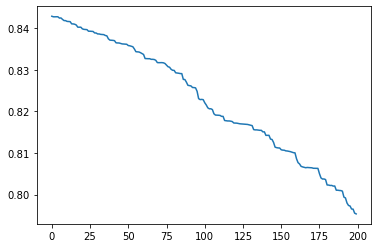

In [18]:
plt.plot(losses)

In [19]:
# присвоение класса [0,1] по предсказанной вероятности
y_pred = [1 if k > threshold else 0 for k in y_pred]

# точность модели
accuracy_score(y_train, y_pred)

0.6285714285714286

### Логистическая регрессия (Метод RMSProp)

In [20]:
EPOCHS = 200
LEARNING_RATE = 0.01
gamma = 0.9
threshold = 0.5
e = 10**-6

losses = []
y_preds = []
vt_b = []
vt_w = []
w = np.random.randn(n)
b = np.random.randn()
Eg2_b = [0 for _ in range(len(X_train))]
Eg2_w = [0 for _ in range(len(X_train))]

for i in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid((X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)
    
    Eg2_b[i] = gamma * Eg2_b[i] + (1-gamma) * (np.sum(current_prediction- y_train[i]) / len(y_train)) **2
    Eg2_w[i] = gamma * Eg2_w[i] + (1-gamma) * (np.sum((current_prediction - y_train[i]) * X_train[i]) / len(y_train)) **2

    b -= (LEARNING_RATE * np.sum(current_prediction- y_train[i]) / len(y_train)) / np.sqrt(Eg2_b[i]+ e)
    w -= (LEARNING_RATE * np.sum(current_prediction- y_train[i]) / len(y_train) * X_train[i]) / np.sqrt(Eg2_b[i]+ e)

In [21]:
w, b

(array([ 2.39213843, -0.12344694]), 0.35883436210403297)

In [22]:
# predict_proba
y_pred

array([2.50398218e-02, 9.28904464e-04, 2.12787102e-03, 9.98237621e-01,
       1.42161160e-02, 9.29588427e-01, 9.30990610e-01, 3.66117388e-03,
       3.93421039e-03, 9.55550847e-01, 9.64058900e-04, 1.22999225e-02,
       3.62711909e-02, 9.97497242e-01, 8.15294440e-01, 1.55676865e-02,
       3.02224065e-03, 6.87899655e-04, 9.43253261e-01, 9.91007932e-01,
       8.80805063e-03, 8.56820974e-02, 9.95845491e-01, 2.77721791e-03,
       9.97053058e-01, 2.19042315e-03, 9.99321819e-01, 6.59565097e-03,
       9.99255482e-01, 9.93124990e-01, 9.89820793e-01, 1.24755098e-02,
       9.98887872e-01, 9.82476298e-01, 8.66281240e-01, 3.09100026e-01,
       9.99937840e-01, 2.97834290e-03, 9.85674614e-01, 9.66505864e-01,
       1.76443674e-02, 9.93564425e-01, 1.05763778e-01, 9.91540812e-01,
       1.57556470e-03, 9.47934583e-01, 1.94720219e-05, 9.99932279e-01,
       1.96006635e-04, 2.16694905e-02, 9.59844018e-01, 9.94834063e-01,
       8.47117063e-03, 9.88784462e-01, 4.60558155e-04, 2.07181191e-03,
      

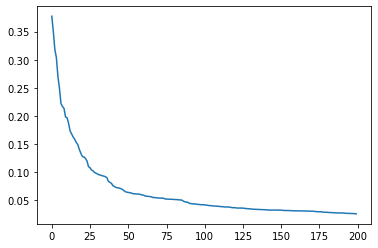

In [23]:
plt.plot(losses)

In [24]:
# присвоение класса [0,1] по предсказанной вероятности
y_pred = [1 if k > threshold else 0 for k in y_pred]

# точность модели
accuracy_score(y_train, y_pred)

1.0